# FIFA Players Classification

This notebook contains the code to train models for the FIFA Classification problem based on their attributes

## Step 1: Import libraries

Libraries we will be using:
- **tensorflow** and **keras**: APIs for neural network model construction and training
- **numpy**: Numerical python library.
- **pandas**: Will be used to work with dataframes from .csv files.
- **sklearn**: Will be used to modify the labels of the data and do some statistical modifications.
- **matplotlib**: Will be used to plot graphics.
- **time**: To measure training time.
- **datetime**: To get the datetime a new model is created and use that to create its name

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime

## Step 2: Load data

We first define the path to our data

In [2]:
DATA_FOLDER = "../Data"

ATT_FILE = f"{DATA_FOLDER}/FootballPlayerPreparedCleanAttributes.csv"
IMPUTED_ATT_FILE = f"{DATA_FOLDER}/ImputedFootballPlayerPreparedCleanAttributes.csv"

ONE_HOT_LABEL_FILE = f"{DATA_FOLDER}/FootballPlayerOneHotEncodedClasses.csv"
IMPUTED_ONE_HOT_LABEL_FILE = f"{DATA_FOLDER}/ImputedFootballPlayerPreparedCleanAttributes.csv"

Specify training options:
- **IMPUTED_DATA**: We will use file with data imputed
- **TRAIN_RATE**: The amount of instances to use during training, it will also determine the dev and test instances number indirectly

In [3]:
IMPUTED_DATA = False    # Use imputed dataset
TRAIN_RATE = 0.8        # The division of the data for training, validation and test

Because our data has more than 10000, we will be using 80-10-10 split in our dataset:
- **80%** for training
- **10%** for validation/dev test
- **10%** for final test

In [4]:
if IMPUTED_DATA:
    attributes = pd.read_csv(ATT_IMPUTED_FILE)
    labels = pd.read_csv(ONE_HOT_LABEL_IMPUTED_FILE)
else:
    attributes = pd.read_csv(ATT_FILE)
    labels = pd.read_csv(ONE_HOT_LABEL_FILE)

n_total_instances = attributes.shape[0]
n_train_instances = int(n_total_instances * TRAIN_RATE)
n_dev_instances = int((n_total_instances - n_train_instances)/2)

instances_train = attributes.values[:n_train_instances]
labels_train = labels.values[:n_train_instances]

instances_dev = attributes.values[n_train_instances: n_train_instances + n_dev_instances]
labels_dev = labels.values[n_train_instances: n_train_instances + n_dev_instances]

print("instances_train:", instances_train.shape)
print("labels_train:", labels_train.shape)
print("instances_dev:", instances_dev.shape)
print("labels_dev:",labels_dev.shape)

instances_train: (12897, 17)
labels_train: (12897, 4)
instances_dev: (1612, 17)
labels_dev: (1612, 4)


## Step 3: Initialize variables
- **INPUT_SIZE**: The size of the training instances
- **OUTPUT_SIZE**: The number of possible classes
- **NUM_TRAINING_EXAMPLES**: The number of possible classes
- **NUM_DEV_EXAMPLES**: The number of validation/dev test instances

In [5]:
INPUT_SIZE = instances_train.shape[1]
OUTPUT_SIZE = labels_train.shape[1]
NUM_TRAINING_EXAMPLES = int(round(instances_train.shape[0]/1))
NUM_DEV_EXAMPLES = int(round(instances_dev.shape[0]/1))

## Step 4: Set hyperparameters

- **LEARNING_RATE** $\alpha$: The step size in the learning process
- **BATCH_SIZE**: The size of each batch
- **N_HIDDEN**: Number of neurons in the hidden.

The learning process stops when it reaches 20,000 learning iterations. An iteration comprises presenting the network *batch_size* learning examples and then adjusting the weights (parameters).

In [6]:
N_EPOCHS = 1000
LEARNING_RATE = 0.1
BATCH_SIZE = 128
ACTIVATION = "tanh"
N_HIDDEN = [512]
LOSS = tf.keras.losses.categorical_crossentropy
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE)
METRICS = ["categorical_accuracy"]

## Step 5: Build the model

In [7]:
def test_model():
    model = keras.Sequential(name="Model")
    model.add(keras.layers.InputLayer(input_shape=(INPUT_SIZE,), batch_size=None))
    for neurons in N_HIDDEN:
        model.add(keras.layers.Dense(neurons, activation=ACTIVATION))
    model.add(keras.layers.Dense(OUTPUT_SIZE, activation="softmax"))
    
    model_name = "D512"
    return model, model_name

def compile_model(model):
    my_model.compile(loss=LOSS,
                     optimizer=OPTIMIZER,
                     metrics=METRICS)

In [8]:
my_model, model_name = test_model()

In [9]:
compile_model(my_model)

## Step 6: Train the model

In [10]:
start_time = time.perf_counter()
history = my_model.fit(instances_train,
                       labels_train,
                       batch_size=BATCH_SIZE,
                       epochs=N_EPOCHS,
                       verbose=1,
                       validation_data=(instances_dev, labels_dev))
end_time = time.perf_counter()

Epoch 1/1000
101/101 [==============================] - 2s 5ms/step - loss: 0.9907 - categorical_accuracy: 0.5610 - val_loss: 0.8689 - val_categorical_accuracy: 0.6017
Epoch 2/1000
101/101 [==============================] - 0s 4ms/step - loss: 0.8092 - categorical_accuracy: 0.6406 - val_loss: 0.7851 - val_categorical_accuracy: 0.6272
Epoch 3/1000
101/101 [==============================] - 0s 4ms/step - loss: 0.7463 - categorical_accuracy: 0.6709 - val_loss: 0.7438 - val_categorical_accuracy: 0.6495
Epoch 4/1000
101/101 [==============================] - 0s 4ms/step - loss: 0.7128 - categorical_accuracy: 0.6835 - val_loss: 0.7205 - val_categorical_accuracy: 0.6644
Epoch 5/1000
101/101 [==============================] - 0s 4ms/step - loss: 0.6930 - categorical_accuracy: 0.6922 - val_loss: 0.7068 - val_categorical_accuracy: 0.6762
Epoch 6/1000
101/101 [==============================] - 0s 4ms/step - loss: 0.6808 - categorical_accuracy: 0.6968 - val_loss: 0.6975 - val_categorical_accuracy:

101/101 [==============================] - 1s 5ms/step - loss: 0.5535 - categorical_accuracy: 0.7528 - val_loss: 0.5642 - val_categorical_accuracy: 0.7413
Epoch 50/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.5486 - categorical_accuracy: 0.7569 - val_loss: 0.5595 - val_categorical_accuracy: 0.7475
Epoch 51/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.5446 - categorical_accuracy: 0.7555 - val_loss: 0.5591 - val_categorical_accuracy: 0.7401
Epoch 52/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.5412 - categorical_accuracy: 0.7597 - val_loss: 0.5517 - val_categorical_accuracy: 0.7432
Epoch 53/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.5364 - categorical_accuracy: 0.7599 - val_loss: 0.5487 - val_categorical_accuracy: 0.7444
Epoch 54/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.5333 - categorical_accuracy: 0.7606 - val_loss: 0.5462 - val_categorical_accuracy: 0.7500


101/101 [==============================] - 0s 5ms/step - loss: 0.4725 - categorical_accuracy: 0.7892 - val_loss: 0.4890 - val_categorical_accuracy: 0.7816
Epoch 98/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4720 - categorical_accuracy: 0.7879 - val_loss: 0.4836 - val_categorical_accuracy: 0.7823
Epoch 99/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4706 - categorical_accuracy: 0.7913 - val_loss: 0.4823 - val_categorical_accuracy: 0.7816
Epoch 100/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4685 - categorical_accuracy: 0.7897 - val_loss: 0.4827 - val_categorical_accuracy: 0.7785
Epoch 101/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4677 - categorical_accuracy: 0.7910 - val_loss: 0.4815 - val_categorical_accuracy: 0.7767
Epoch 102/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4666 - categorical_accuracy: 0.7917 - val_loss: 0.4786 - val_categorical_accuracy: 0.78

101/101 [==============================] - 1s 5ms/step - loss: 0.4421 - categorical_accuracy: 0.8027 - val_loss: 0.4554 - val_categorical_accuracy: 0.7903
Epoch 146/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4422 - categorical_accuracy: 0.8023 - val_loss: 0.4608 - val_categorical_accuracy: 0.7835
Epoch 147/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4421 - categorical_accuracy: 0.8045 - val_loss: 0.4535 - val_categorical_accuracy: 0.7959
Epoch 148/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4417 - categorical_accuracy: 0.8026 - val_loss: 0.4597 - val_categorical_accuracy: 0.7835
Epoch 149/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4414 - categorical_accuracy: 0.8033 - val_loss: 0.4542 - val_categorical_accuracy: 0.7934
Epoch 150/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4416 - categorical_accuracy: 0.8028 - val_loss: 0.4555 - val_categorical_accuracy: 0.

101/101 [==============================] - 1s 5ms/step - loss: 0.4344 - categorical_accuracy: 0.8085 - val_loss: 0.4530 - val_categorical_accuracy: 0.7835
Epoch 194/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4338 - categorical_accuracy: 0.8087 - val_loss: 0.4482 - val_categorical_accuracy: 0.7990
Epoch 195/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4337 - categorical_accuracy: 0.8075 - val_loss: 0.4522 - val_categorical_accuracy: 0.8015
Epoch 196/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4340 - categorical_accuracy: 0.8060 - val_loss: 0.4508 - val_categorical_accuracy: 0.7965
Epoch 197/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4329 - categorical_accuracy: 0.8079 - val_loss: 0.4488 - val_categorical_accuracy: 0.7916
Epoch 198/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4329 - categorical_accuracy: 0.8049 - val_loss: 0.4491 - val_categorical_accuracy: 0.

101/101 [==============================] - 1s 5ms/step - loss: 0.4262 - categorical_accuracy: 0.8094 - val_loss: 0.4447 - val_categorical_accuracy: 0.7953
Epoch 242/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4263 - categorical_accuracy: 0.8132 - val_loss: 0.4452 - val_categorical_accuracy: 0.8071
Epoch 243/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4260 - categorical_accuracy: 0.8103 - val_loss: 0.4458 - val_categorical_accuracy: 0.7940
Epoch 244/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4251 - categorical_accuracy: 0.8125 - val_loss: 0.4470 - val_categorical_accuracy: 0.8058
Epoch 245/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4260 - categorical_accuracy: 0.8096 - val_loss: 0.4468 - val_categorical_accuracy: 0.8046
Epoch 246/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4249 - categorical_accuracy: 0.8117 - val_loss: 0.4488 - val_categorical_accuracy: 0.

101/101 [==============================] - 1s 5ms/step - loss: 0.4186 - categorical_accuracy: 0.8152 - val_loss: 0.4424 - val_categorical_accuracy: 0.7978
Epoch 290/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4191 - categorical_accuracy: 0.8143 - val_loss: 0.4409 - val_categorical_accuracy: 0.8065
Epoch 291/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4189 - categorical_accuracy: 0.8139 - val_loss: 0.4406 - val_categorical_accuracy: 0.8033
Epoch 292/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4186 - categorical_accuracy: 0.8166 - val_loss: 0.4413 - val_categorical_accuracy: 0.8096
Epoch 293/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4192 - categorical_accuracy: 0.8137 - val_loss: 0.4406 - val_categorical_accuracy: 0.7990
Epoch 294/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4185 - categorical_accuracy: 0.8171 - val_loss: 0.4420 - val_categorical_accuracy: 0.

101/101 [==============================] - 1s 5ms/step - loss: 0.4138 - categorical_accuracy: 0.8188 - val_loss: 0.4387 - val_categorical_accuracy: 0.8040
Epoch 338/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4137 - categorical_accuracy: 0.8193 - val_loss: 0.4398 - val_categorical_accuracy: 0.8002
Epoch 339/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4134 - categorical_accuracy: 0.8180 - val_loss: 0.4389 - val_categorical_accuracy: 0.8015
Epoch 340/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4129 - categorical_accuracy: 0.8179 - val_loss: 0.4385 - val_categorical_accuracy: 0.8065
Epoch 341/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4133 - categorical_accuracy: 0.8200 - val_loss: 0.4364 - val_categorical_accuracy: 0.8096
Epoch 342/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4124 - categorical_accuracy: 0.8196 - val_loss: 0.4378 - val_categorical_accuracy: 0.

101/101 [==============================] - 1s 5ms/step - loss: 0.4084 - categorical_accuracy: 0.8221 - val_loss: 0.4344 - val_categorical_accuracy: 0.8046
Epoch 386/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4087 - categorical_accuracy: 0.8215 - val_loss: 0.4358 - val_categorical_accuracy: 0.8096
Epoch 387/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4088 - categorical_accuracy: 0.8216 - val_loss: 0.4369 - val_categorical_accuracy: 0.8046
Epoch 388/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4091 - categorical_accuracy: 0.8230 - val_loss: 0.4356 - val_categorical_accuracy: 0.8052
Epoch 389/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4090 - categorical_accuracy: 0.8222 - val_loss: 0.4348 - val_categorical_accuracy: 0.8108
Epoch 390/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4082 - categorical_accuracy: 0.8224 - val_loss: 0.4358 - val_categorical_accuracy: 0.

101/101 [==============================] - 1s 5ms/step - loss: 0.4046 - categorical_accuracy: 0.8241 - val_loss: 0.4318 - val_categorical_accuracy: 0.8120
Epoch 434/1000
101/101 [==============================] - 1s 6ms/step - loss: 0.4051 - categorical_accuracy: 0.8239 - val_loss: 0.4336 - val_categorical_accuracy: 0.8108
Epoch 435/1000
101/101 [==============================] - 1s 6ms/step - loss: 0.4054 - categorical_accuracy: 0.8245 - val_loss: 0.4325 - val_categorical_accuracy: 0.8040
Epoch 436/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4058 - categorical_accuracy: 0.8221 - val_loss: 0.4326 - val_categorical_accuracy: 0.8083
Epoch 437/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4047 - categorical_accuracy: 0.8263 - val_loss: 0.4325 - val_categorical_accuracy: 0.8114
Epoch 438/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4053 - categorical_accuracy: 0.8231 - val_loss: 0.4340 - val_categorical_accuracy: 0.

101/101 [==============================] - 1s 5ms/step - loss: 0.4025 - categorical_accuracy: 0.8252 - val_loss: 0.4347 - val_categorical_accuracy: 0.8009
Epoch 482/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4023 - categorical_accuracy: 0.8259 - val_loss: 0.4330 - val_categorical_accuracy: 0.8108
Epoch 483/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4028 - categorical_accuracy: 0.8251 - val_loss: 0.4364 - val_categorical_accuracy: 0.8027
Epoch 484/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4027 - categorical_accuracy: 0.8239 - val_loss: 0.4321 - val_categorical_accuracy: 0.8096
Epoch 485/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4024 - categorical_accuracy: 0.8245 - val_loss: 0.4315 - val_categorical_accuracy: 0.8108
Epoch 486/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4023 - categorical_accuracy: 0.8248 - val_loss: 0.4337 - val_categorical_accuracy: 0.

101/101 [==============================] - 1s 5ms/step - loss: 0.4009 - categorical_accuracy: 0.8259 - val_loss: 0.4328 - val_categorical_accuracy: 0.8089
Epoch 530/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4011 - categorical_accuracy: 0.8261 - val_loss: 0.4313 - val_categorical_accuracy: 0.8102
Epoch 531/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4005 - categorical_accuracy: 0.8277 - val_loss: 0.4334 - val_categorical_accuracy: 0.8096
Epoch 532/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4009 - categorical_accuracy: 0.8256 - val_loss: 0.4308 - val_categorical_accuracy: 0.8096
Epoch 533/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4005 - categorical_accuracy: 0.8246 - val_loss: 0.4360 - val_categorical_accuracy: 0.7996
Epoch 534/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.4005 - categorical_accuracy: 0.8272 - val_loss: 0.4314 - val_categorical_accuracy: 0.

101/101 [==============================] - 1s 5ms/step - loss: 0.3988 - categorical_accuracy: 0.8238 - val_loss: 0.4310 - val_categorical_accuracy: 0.8077
Epoch 578/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3988 - categorical_accuracy: 0.8279 - val_loss: 0.4346 - val_categorical_accuracy: 0.8058
Epoch 579/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3991 - categorical_accuracy: 0.8265 - val_loss: 0.4323 - val_categorical_accuracy: 0.8083
Epoch 580/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3988 - categorical_accuracy: 0.8259 - val_loss: 0.4317 - val_categorical_accuracy: 0.8077
Epoch 581/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3986 - categorical_accuracy: 0.8274 - val_loss: 0.4321 - val_categorical_accuracy: 0.8133
Epoch 582/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3986 - categorical_accuracy: 0.8280 - val_loss: 0.4337 - val_categorical_accuracy: 0.

101/101 [==============================] - 1s 5ms/step - loss: 0.3971 - categorical_accuracy: 0.8260 - val_loss: 0.4329 - val_categorical_accuracy: 0.8083
Epoch 626/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3975 - categorical_accuracy: 0.8283 - val_loss: 0.4307 - val_categorical_accuracy: 0.8158
Epoch 627/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3975 - categorical_accuracy: 0.8262 - val_loss: 0.4308 - val_categorical_accuracy: 0.8127
Epoch 628/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3976 - categorical_accuracy: 0.8276 - val_loss: 0.4312 - val_categorical_accuracy: 0.8096
Epoch 629/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3976 - categorical_accuracy: 0.8278 - val_loss: 0.4303 - val_categorical_accuracy: 0.8102
Epoch 630/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3972 - categorical_accuracy: 0.8269 - val_loss: 0.4290 - val_categorical_accuracy: 0.

101/101 [==============================] - 1s 5ms/step - loss: 0.3959 - categorical_accuracy: 0.8269 - val_loss: 0.4297 - val_categorical_accuracy: 0.8151
Epoch 674/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3960 - categorical_accuracy: 0.8270 - val_loss: 0.4302 - val_categorical_accuracy: 0.8139
Epoch 675/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3963 - categorical_accuracy: 0.8286 - val_loss: 0.4348 - val_categorical_accuracy: 0.8089
Epoch 676/1000
101/101 [==============================] - 1s 6ms/step - loss: 0.3954 - categorical_accuracy: 0.8276 - val_loss: 0.4292 - val_categorical_accuracy: 0.8114
Epoch 677/1000
101/101 [==============================] - 1s 6ms/step - loss: 0.3964 - categorical_accuracy: 0.8269 - val_loss: 0.4284 - val_categorical_accuracy: 0.8114
Epoch 678/1000
101/101 [==============================] - 1s 6ms/step - loss: 0.3960 - categorical_accuracy: 0.8259 - val_loss: 0.4340 - val_categorical_accuracy: 0.

101/101 [==============================] - 1s 5ms/step - loss: 0.3949 - categorical_accuracy: 0.8268 - val_loss: 0.4286 - val_categorical_accuracy: 0.8151
Epoch 722/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3948 - categorical_accuracy: 0.8282 - val_loss: 0.4273 - val_categorical_accuracy: 0.8139
Epoch 723/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3950 - categorical_accuracy: 0.8276 - val_loss: 0.4312 - val_categorical_accuracy: 0.8065
Epoch 724/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3951 - categorical_accuracy: 0.8263 - val_loss: 0.4305 - val_categorical_accuracy: 0.8176
Epoch 725/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3945 - categorical_accuracy: 0.8265 - val_loss: 0.4280 - val_categorical_accuracy: 0.8151
Epoch 726/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3946 - categorical_accuracy: 0.8269 - val_loss: 0.4288 - val_categorical_accuracy: 0.

101/101 [==============================] - 1s 5ms/step - loss: 0.3945 - categorical_accuracy: 0.8277 - val_loss: 0.4289 - val_categorical_accuracy: 0.8077
Epoch 770/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3939 - categorical_accuracy: 0.8286 - val_loss: 0.4321 - val_categorical_accuracy: 0.8120
Epoch 771/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3939 - categorical_accuracy: 0.8297 - val_loss: 0.4324 - val_categorical_accuracy: 0.8139
Epoch 772/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3942 - categorical_accuracy: 0.8283 - val_loss: 0.4295 - val_categorical_accuracy: 0.8114
Epoch 773/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3944 - categorical_accuracy: 0.8269 - val_loss: 0.4273 - val_categorical_accuracy: 0.8096
Epoch 774/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3937 - categorical_accuracy: 0.8268 - val_loss: 0.4297 - val_categorical_accuracy: 0.

101/101 [==============================] - 1s 5ms/step - loss: 0.3931 - categorical_accuracy: 0.8284 - val_loss: 0.4264 - val_categorical_accuracy: 0.8139
Epoch 818/1000
101/101 [==============================] - 1s 6ms/step - loss: 0.3919 - categorical_accuracy: 0.8300 - val_loss: 0.4300 - val_categorical_accuracy: 0.8083
Epoch 819/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3936 - categorical_accuracy: 0.8278 - val_loss: 0.4283 - val_categorical_accuracy: 0.8189
Epoch 820/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3928 - categorical_accuracy: 0.8291 - val_loss: 0.4302 - val_categorical_accuracy: 0.8127
Epoch 821/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3932 - categorical_accuracy: 0.8289 - val_loss: 0.4287 - val_categorical_accuracy: 0.8139
Epoch 822/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3926 - categorical_accuracy: 0.8288 - val_loss: 0.4305 - val_categorical_accuracy: 0.

101/101 [==============================] - 1s 5ms/step - loss: 0.3921 - categorical_accuracy: 0.8292 - val_loss: 0.4287 - val_categorical_accuracy: 0.8096
Epoch 866/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3924 - categorical_accuracy: 0.8279 - val_loss: 0.4302 - val_categorical_accuracy: 0.8077
Epoch 867/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3925 - categorical_accuracy: 0.8285 - val_loss: 0.4283 - val_categorical_accuracy: 0.8158
Epoch 868/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3928 - categorical_accuracy: 0.8282 - val_loss: 0.4279 - val_categorical_accuracy: 0.8158
Epoch 869/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3920 - categorical_accuracy: 0.8285 - val_loss: 0.4301 - val_categorical_accuracy: 0.8083
Epoch 870/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3920 - categorical_accuracy: 0.8300 - val_loss: 0.4315 - val_categorical_accuracy: 0.

101/101 [==============================] - 1s 5ms/step - loss: 0.3920 - categorical_accuracy: 0.8277 - val_loss: 0.4298 - val_categorical_accuracy: 0.8114
Epoch 914/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3917 - categorical_accuracy: 0.8296 - val_loss: 0.4292 - val_categorical_accuracy: 0.8164
Epoch 915/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3915 - categorical_accuracy: 0.8291 - val_loss: 0.4276 - val_categorical_accuracy: 0.8089
Epoch 916/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3923 - categorical_accuracy: 0.8269 - val_loss: 0.4284 - val_categorical_accuracy: 0.8127
Epoch 917/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3912 - categorical_accuracy: 0.8300 - val_loss: 0.4306 - val_categorical_accuracy: 0.8139
Epoch 918/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3915 - categorical_accuracy: 0.8290 - val_loss: 0.4285 - val_categorical_accuracy: 0.

101/101 [==============================] - 1s 5ms/step - loss: 0.3910 - categorical_accuracy: 0.8285 - val_loss: 0.4301 - val_categorical_accuracy: 0.8077
Epoch 962/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3907 - categorical_accuracy: 0.8287 - val_loss: 0.4281 - val_categorical_accuracy: 0.8151
Epoch 963/1000
101/101 [==============================] - 1s 6ms/step - loss: 0.3911 - categorical_accuracy: 0.8298 - val_loss: 0.4285 - val_categorical_accuracy: 0.8077
Epoch 964/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3911 - categorical_accuracy: 0.8288 - val_loss: 0.4272 - val_categorical_accuracy: 0.8108
Epoch 965/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3907 - categorical_accuracy: 0.8289 - val_loss: 0.4280 - val_categorical_accuracy: 0.8114
Epoch 966/1000
101/101 [==============================] - 1s 5ms/step - loss: 0.3910 - categorical_accuracy: 0.8287 - val_loss: 0.4272 - val_categorical_accuracy: 0.

## Step 7: Analyze results

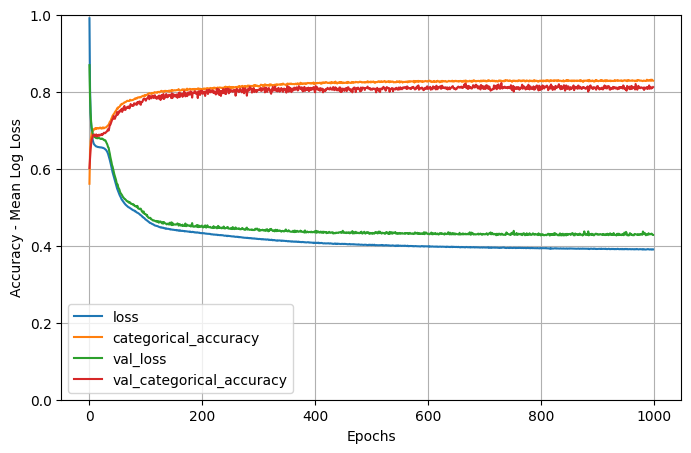

In [11]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [12]:
training_accuracy = round(results.categorical_accuracy.values[-1:][0]*100, 2)
val_accuracy = round(results.val_categorical_accuracy.values[-1:][0]*100, 2)
training_error = round((1 - results.categorical_accuracy.values[-1:][0])*100, 2)
test_error = round((1 - results.val_categorical_accuracy.values[-1:][0])*100, 2)
human_error = 5
bias = round(training_error - human_error, 2)
variance = round(test_error - training_error, 2)
training_time = round(end_time - start_time)
print("Error (training):", training_error, "%")
print("Error (test):", test_error, "%")
print("Bias:", bias)
print("Variance:", variance)
print("Time: ", training_time, "seconds")

Error (training): 17.12 %
Error (test): 18.8 %
Bias: 12.12
Variance: 1.68
Time:  533 seconds


## Step 8: Save results

In [13]:
RESULTS_FOLDER = "../Results"
RESULTS_FILE = f"{RESULTS_FOLDER}/models_performance.csv"

In [14]:
results_df = pd.read_csv(RESULTS_FILE, index_col = 0)

In [15]:
COLUMNS = [
    'model_name',
    'epochs',
    'learning_rate',
    'batch_size',
    'activation',
    'loss',
    'optimizer',
    'regularization',
    'train_accuracy',
    'validation_accuracy',
    'bias',
    'variance',
    'training_time'
]

new_result = [[
    model_name,
    N_EPOCHS,
    LEARNING_RATE,
    BATCH_SIZE,
    ACTIVATION,
    "categorical_crossentropy",
    "SGD",
    "",
    training_accuracy,
    val_accuracy,
    bias,
    variance,
    training_time]]

new_result_df = pd.DataFrame(new_result, columns=COLUMNS)
concatenation = pd.concat([results_df, new_result_df], ignore_index=True)
concatenation.to_csv(RESULTS_FILE)


In [16]:
last_five = concatenation.tail(5)
print(last_five)
print("\n---Metrics---")
print(last_five[["train_accuracy", "validation_accuracy", "bias", "variance", "training_time"]].describe())

   model_name  epochs  learning_rate  batch_size activation  \
20       D512    1000            0.1         128       tanh   
21       D512    1000            0.1         128       tanh   
22       D512    1000            0.1         128       tanh   
23       D512    1000            0.1         128       tanh   
24       D512    1000            0.1         128       tanh   

                        loss optimizer regularization  train_accuracy  \
20  categorical_crossentropy       SGD            NaN           83.07   
21  categorical_crossentropy       SGD            NaN           83.09   
22  categorical_crossentropy       SGD            NaN           82.61   
23  categorical_crossentropy       SGD            NaN           82.96   
24  categorical_crossentropy       SGD                          82.88   

    validation_accuracy   bias  variance  training_time  
20                81.08  11.93      1.99            523  
21                80.83  11.91      2.26            481  
22      

In [17]:
MODELS_FOLDER = "../Models"
save_name = f"{MODELS_FOLDER}/{model_name}-5.h5"
my_model.save(save_name)